In [2]:
from google.colab import files
files.upload()

Saving titanic.csv to titanic.csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\n13,0,3,"Saundercock, Mr

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simple line plot using Matplotlib

x = [0 1 2 3 4 5 6 7 8 9]
y = [69 10 59 52 62 33 23 63 55 35]
y plotted against x:


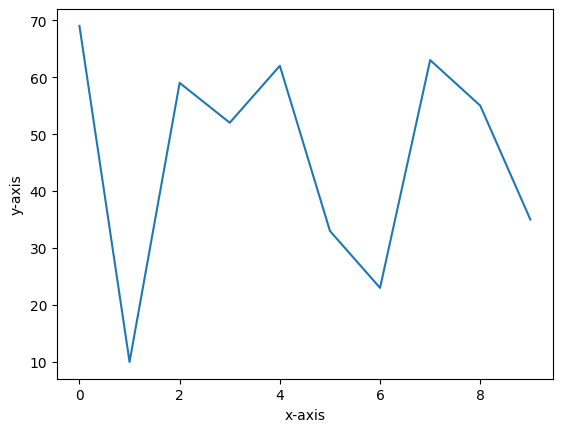

In [4]:
x = np.array(range(10))
y = np.random.randint(0, 100, 10)
print(f"x = {x}")
print(f"y = {y}")
print("y plotted against x:")
plt.plot(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [5]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Bar chart using Matplotlib

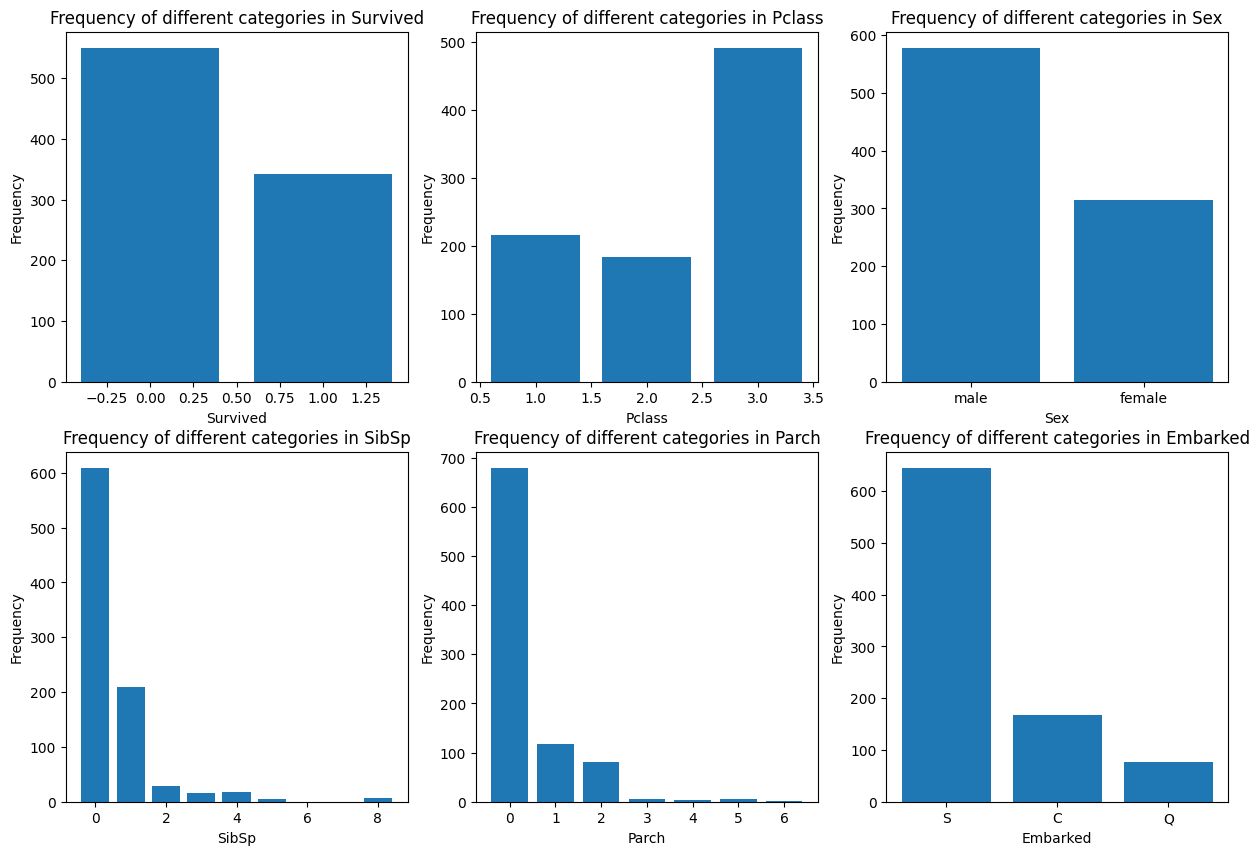

In [6]:
import math
max_cats = 0.01 * len(df)
unique_vars = [column for column in df.columns if df[column].nunique() <= max_cats]   # if a column has more than 10 unique vlaues then it is not categorical
n_plots = len(unique_vars)
n_rows = 2
n_cols = math.ceil(n_plots / n_rows)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # subplots will be created in 2 rows, and columns according to total number of unique columns in the dataframe
axes = axes.flatten()
for index, column in enumerate(unique_vars):
  ax = axes[index]
  value_counts = df[column].value_counts()
  ax.bar(value_counts.index, value_counts.values)
  ax.set_title(f"Frequency of different categories in {column}")
  ax.set_xlabel(column)
  ax.set_ylabel("Frequency")




# Scatter plot using Matplotlib

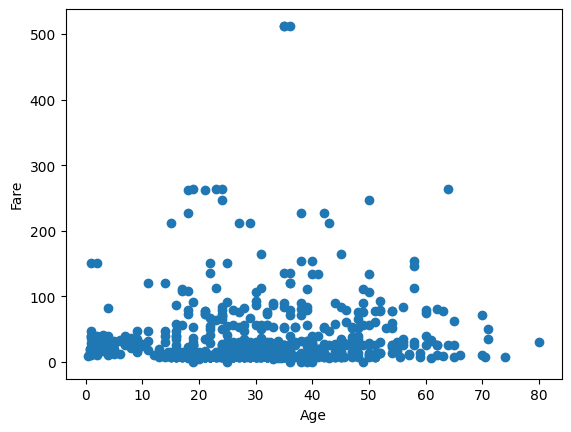

In [7]:
age = df.Age
fare = df.Fare
plt.scatter(age, fare)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

#  Pairplot using Seaborn

In [8]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


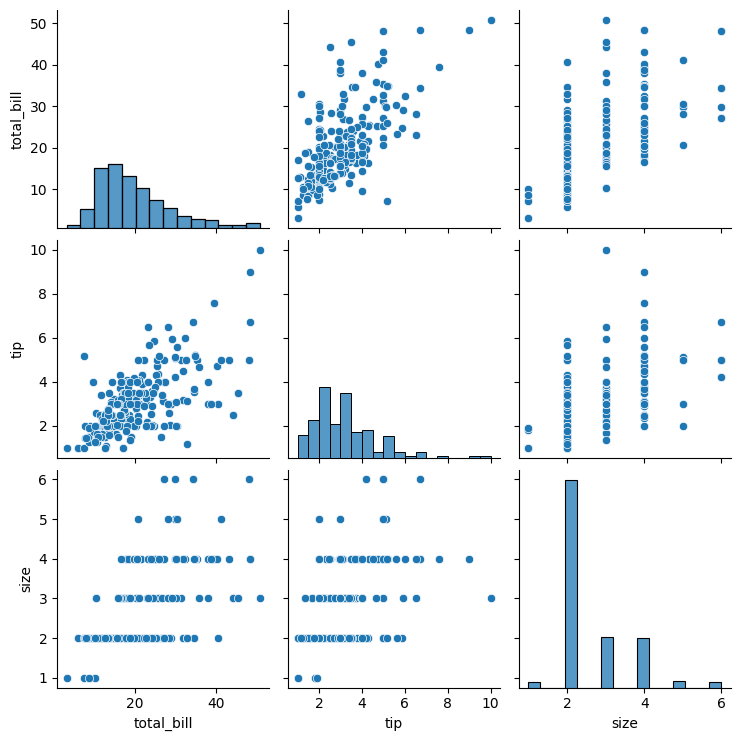

In [12]:
sns.pairplot(tips_df)
plt.show()

#  Box plot using Seaborn

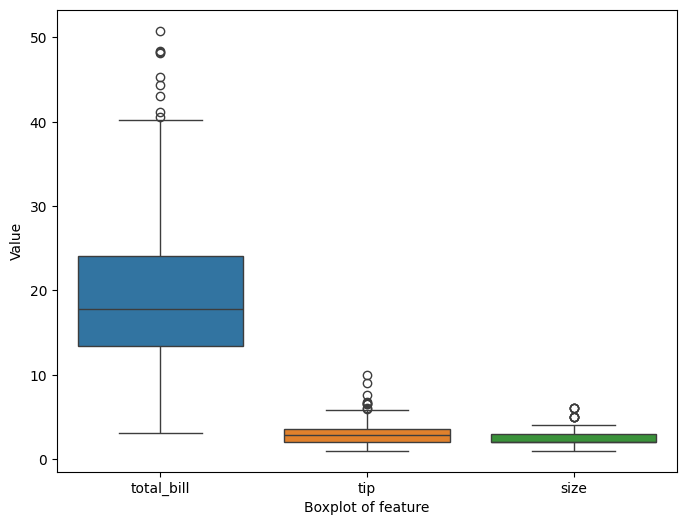

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=tips_df)
plt.xlabel("Boxplot of feature")
plt.ylabel("Value")
plt.show()

# Heatmap using Seaborn

<Axes: >

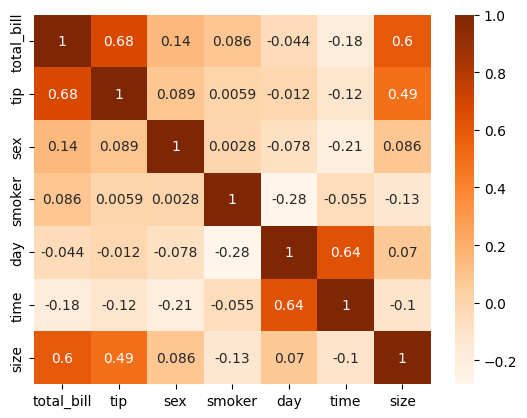

In [14]:
from sklearn.preprocessing import LabelEncoder   # Since string(categorical) values are present in the dataset so these need to be encoded
encoder = LabelEncoder()
encoded_tips_df = tips_df.copy()
for col in tips_df.select_dtypes(include=['category']).columns:  # select the columns having datatype as category
  encoded_tips_df[col] = encoder.fit_transform(tips_df[col])

corr_matrix = encoded_tips_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="Oranges")

# Matplotlib to create a subplot grid that displays multiple charts

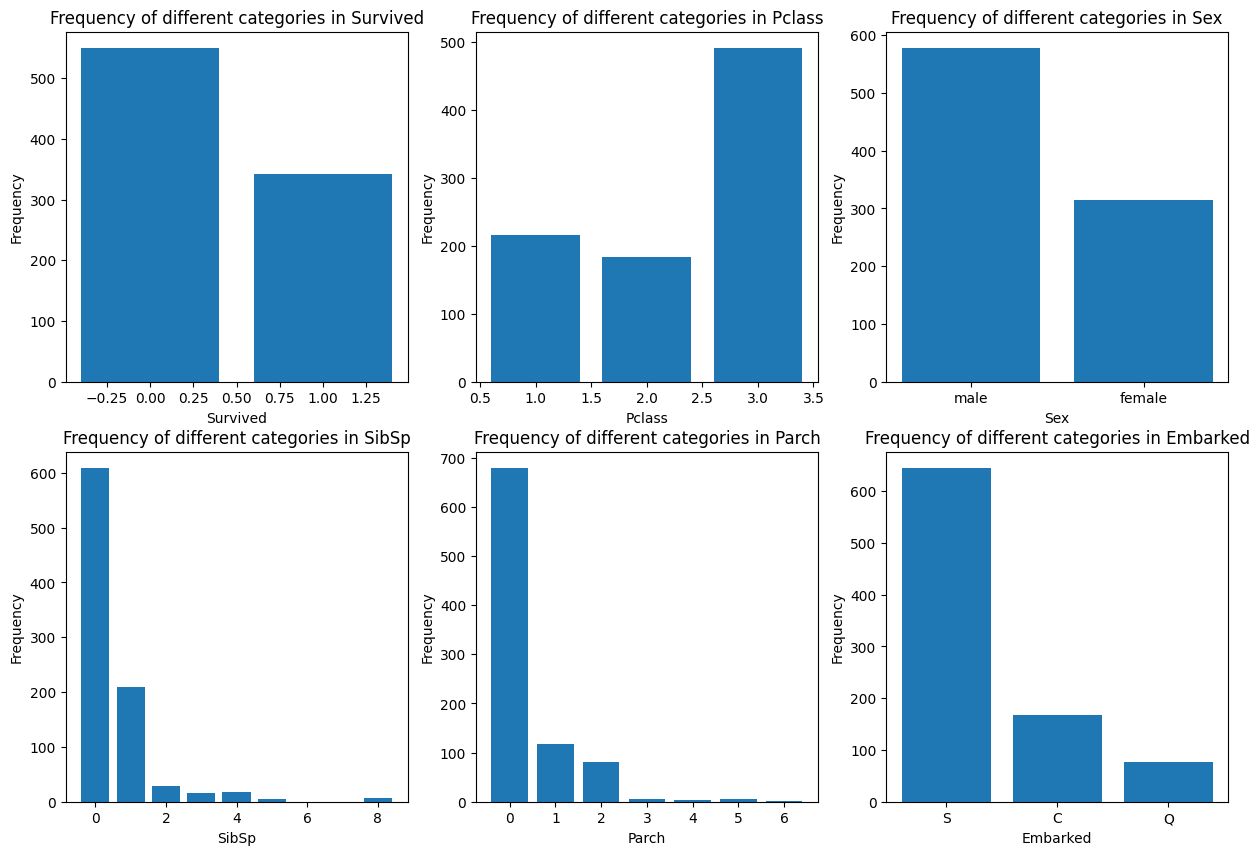

In [15]:
import math
max_cats = 0.01 * len(df)
unique_vars = [column for column in df.columns if df[column].nunique() <= max_cats]   # if a column has more than 10 unique vlaues then it is not categorical
n_plots = len(unique_vars)
n_rows = 2
n_cols = math.ceil(n_plots / n_rows)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # subplots will be created in 2 rows, and columns according to total number of unique columns in the dataframe
axes = axes.flatten()
for index, column in enumerate(unique_vars):
  ax = axes[index]
  value_counts = df[column].value_counts()
  ax.bar(value_counts.index, value_counts.values)
  ax.set_title(f"Frequency of different categories in {column}")
  ax.set_xlabel(column)
  ax.set_ylabel("Frequency")

# Customize the appearance of a Seaborn

<ipython-input-16-76be491e5554>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=age, y=fare, palette='S2')


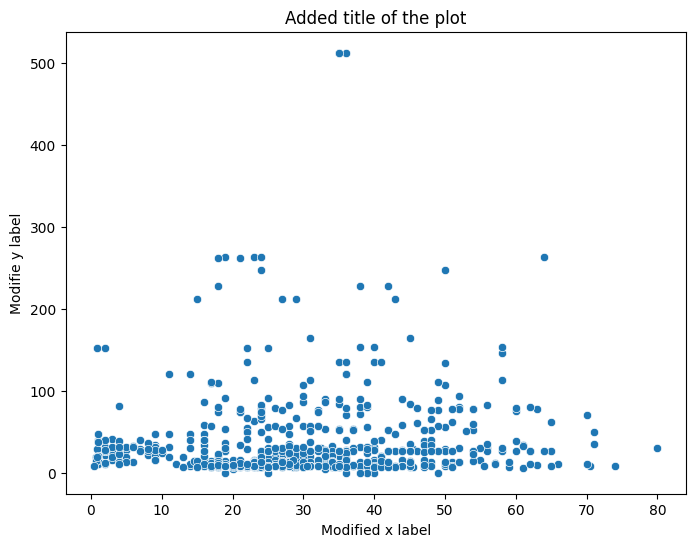

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=age, y=fare, palette='S2')
plt.xlabel("Modified x label")
plt.ylabel("Modifie y label")
plt.title("Added title of the plot")
plt.show()

# Violin plot using Seaborn

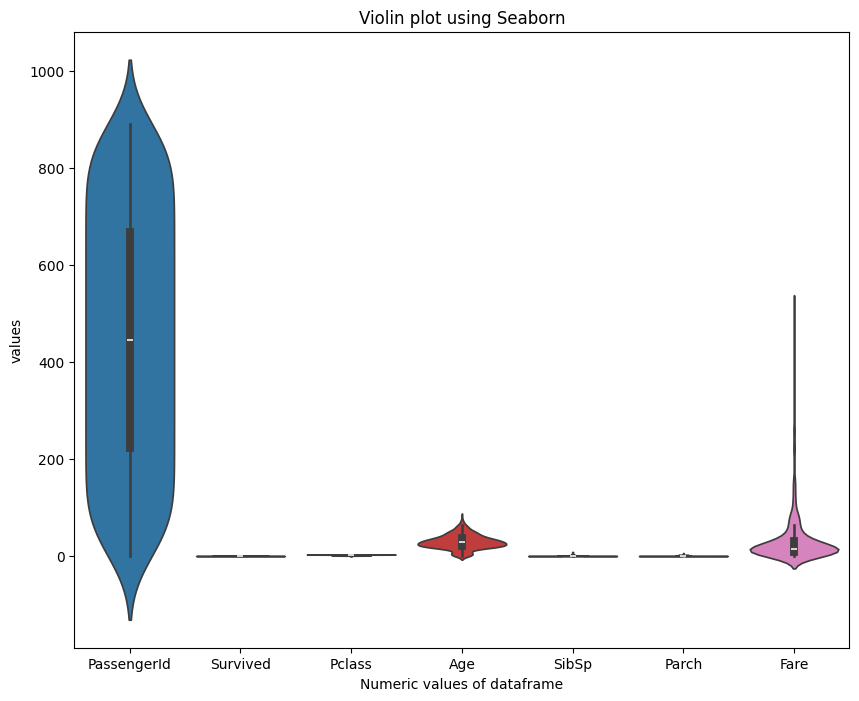

In [17]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df.select_dtypes(include=['int', 'float']))
plt.title("Violin plot using Seaborn")
plt.xlabel("Numeric values of dataframe")
plt.ylabel("values")
plt.show()

# Overlaying a KDE plot on a histogram

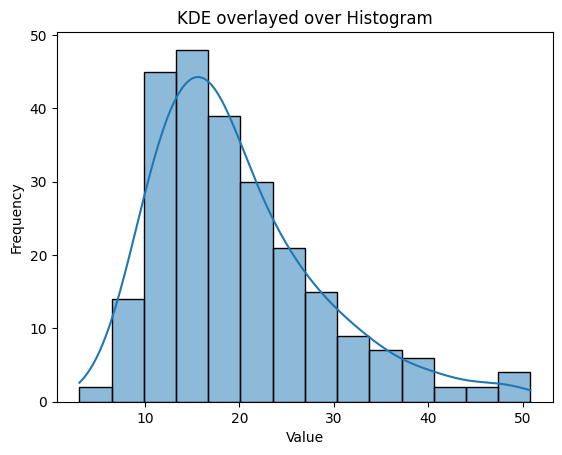

In [22]:
bill_data = tips_df.total_bill
sns.histplot(bill_data, kde=True)

plt.title("KDE overlayed over Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()